# Pokemon data analysis
This project aims to find interesting knowledge from the pokemon dataset. There are some main objectives in the following:
 - Data visualization and correlation between attributes
 - Clustering for legend/not legend
 - frequent item set for types

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



First, read the csv file

In [2]:
X_full = pd.read_csv("data.csv")

List out the data to see the information

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12.7,8.27)})
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 38 columns):
Id                   801 non-null int64
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness     

As there are too many missing cells on type2 as well as percentage_male, we replace for the following:
 - type2 from null to 'None'
 - percentage_male from null to 0

In [32]:
X_full['type2'].fillna('None', inplace=True)
X_full['percentage_male'].fillna(0, inplace=True)

## Data visualization and correlation between attributes
We are going to plot the scatterplot between different attributes. We want to focus on basic stats and height/weight. Lets have a overview look on heatmap first. We can discover that capture rate has a strong negative impact on other attributes. Also, base total has a strong influence on different basic stats.

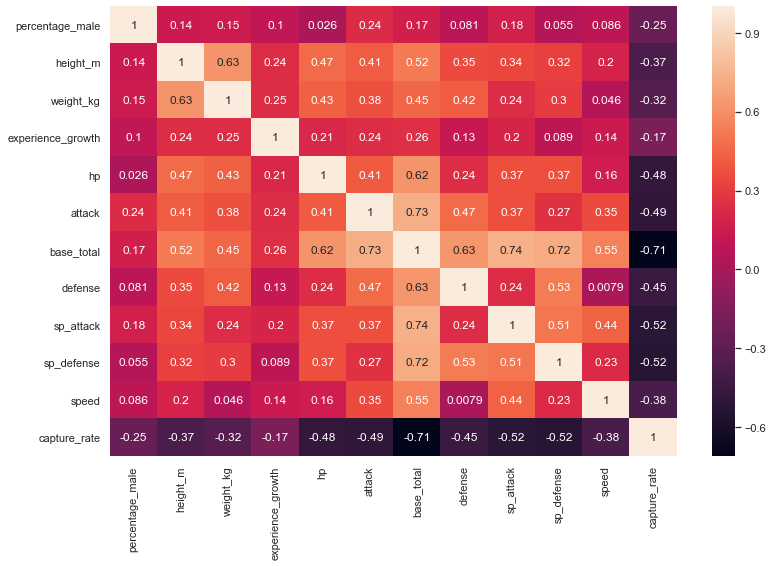

In [37]:
pokemon_mfeatures = ['percentage_male','type1', 'type2', 'height_m', 'weight_kg', 
                     'experience_growth', 'hp', 'attack','base_total',
                     'defense','sp_attack', 'sp_defense', 'speed', 'capture_rate']
poke_mval = X_full[pokemon_mfeatures]
X = pd.DataFrame(poke_mval)
sns.heatmap(X.corr(), annot = True)

Maybe legend characters have extreme values affecting the accuration and corrlation, so we try to filter out and have a look again. After filtering out legends, there are no much changes on correlation.

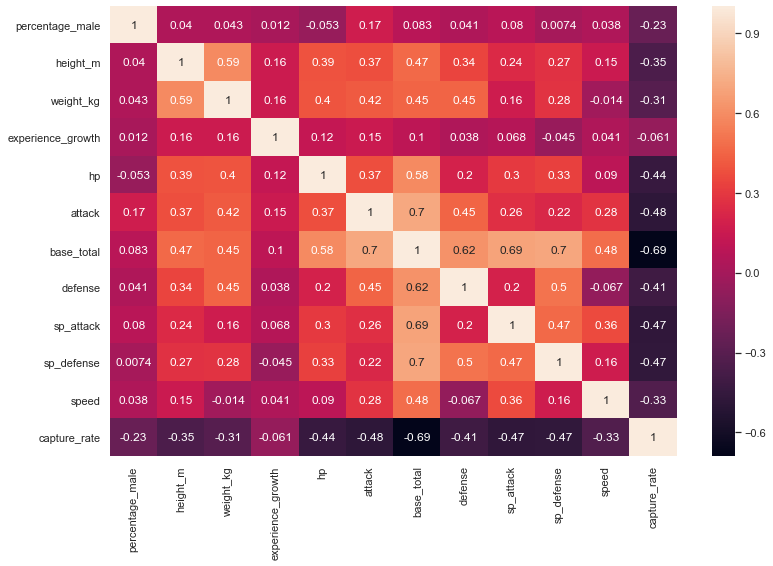

In [40]:
is_not_legend =  X_full['is_legendary']==0
X_not_legend = X[is_not_legend]
X_not_legend = X_not_legend[pokemon_mfeatures]
sns.heatmap(X_not_legend.corr(), annot = True)

Have a look on scatterplot between base total and attack. From the below graph we can discover that there is a positive variation between base_total and attack. 

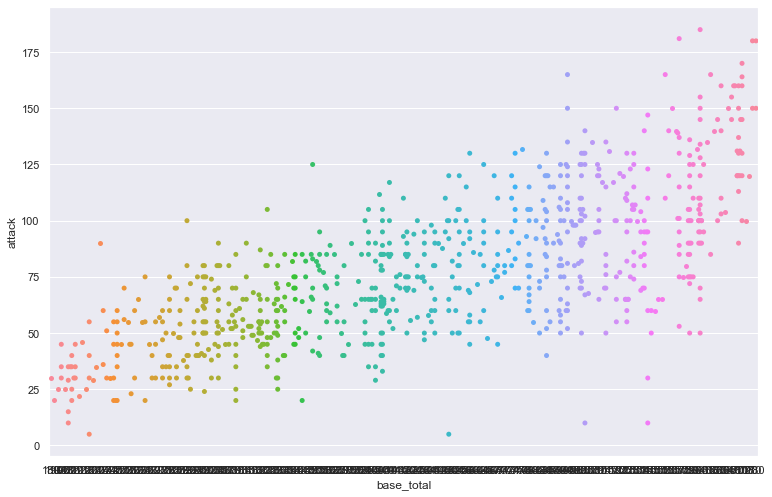

In [38]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['attack'])

## Clustering for legend/not legend
First, we are going to find out the number of having multi-types.

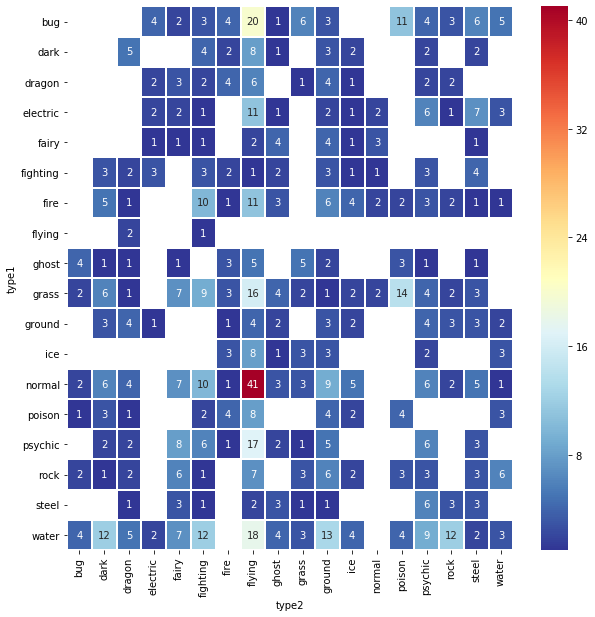

In [24]:
plt.subplots(figsize=(10, 10))
sns.heatmap(
    X_full[X_full['type2'] != 'None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths = 1,
    annot = True,
    cmap = "RdYlBu_r" # color
)

plt.show()